<a href="https://colab.research.google.com/github/Feymankamal/Chromaticity-1931/blob/main/colour_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we plot the CIE 1913 chromaticity diagram with **colour module**

In [1]:
!pip list | grep colour

colour                             0.1.5


Sometimes the environment variable is not set properly so if it gives errors like  **colour is not a module** please *restart the session* and run this cell of code

In [2]:
%env COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
!pip install -q colour-science

!python -c "import imageio;imageio.plugins.freeimage.download()"

!mkdir -p /content/downloads

# Uncomment the following lines for the latest develop  branch content.
!pip uninstall -y colour-science
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout develop && git pull && cd ..; fi

import sys
sys.path.insert(0, 'colour')

env: COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
Found existing installation: colour-science 0.4.6
Uninstalling colour-science-0.4.6:
  Successfully uninstalled colour-science-0.4.6
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 21 (delta 18), reused 21 (delta 18), pack-reused 0 (from 0)
Unpacking objects: 100% (21/21), 3.76 KiB | 56.00 KiB/s, done.
From https://github.com/colour-science/colour
   1799f2e15..d8206def1  feature/v0.4.7 -> origin/feature/v0.4.7
Already on 'develop'
Your branch is up to date with 'origin/develop'.
Already up to date.


The code below is check wheather the environment variable is set properly.

In [3]:
import colour

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.4.6-8-gb0893274a                                          *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.36.0                                                      *
*       matplotlib : 3.8.0                                                    *
*       networkx : 3.4.2                                                      *
*       numpy : 1.26.4                                                        *
*       pandas : 2.2.2                  

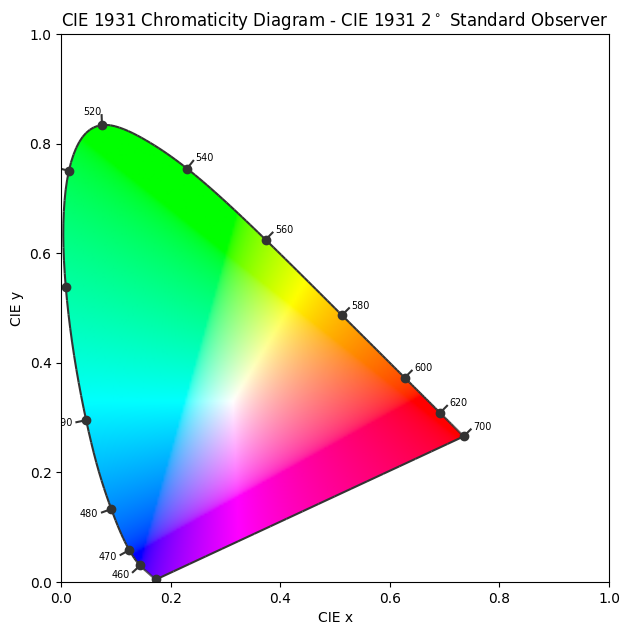

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

In [4]:
from colour.plotting import plot_chromaticity_diagram_CIE1931
plot_chromaticity_diagram_CIE1931()

For plotting points in the chromaticity diagram

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


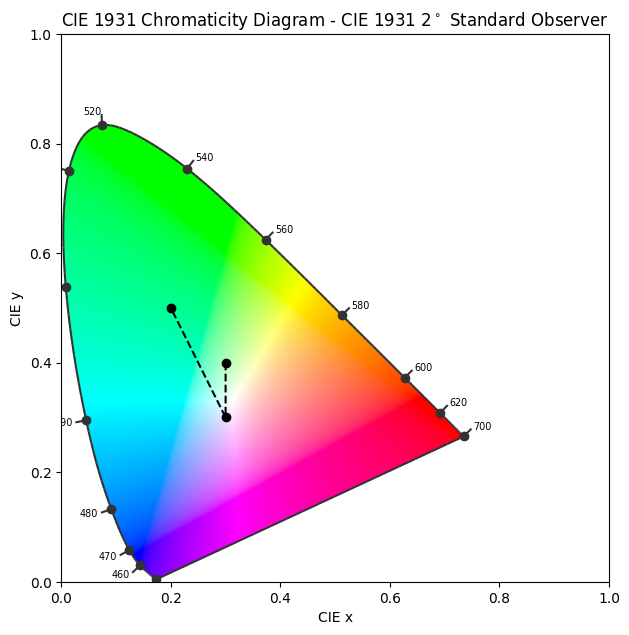

In [5]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot([0.3, 0.3,0.2],[0.4,0.3,0.5],'ko--')

Now we want to calculate the X,Y and Z values by the following formulae

$X(\lambda)=\int_{400} ^{700} R(\lambda)x(\lambda) d\lambda$

$Y(\lambda)=\int_{400} ^{700} R(\lambda)y(\lambda) d\lambda$

$Z(\lambda)=\int_{400} ^{700} R(\lambda)z(\lambda) d\lambda$

from this the points **x,y** are calculated as follows

$x=\frac{X}{X+Y+Z}$

$y=\frac{Y}{X+Y+Z}$


In [6]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Now we will read the necessary data files

* cie colour matching function
* experimental data

In [7]:
%cd /content/sample_data/

/content/sample_data


In [8]:
cie=pd.read_excel('CIE_xyz_1931_2deg.xlsx')

In [9]:
cie

,wave_length,x,y,z
0,360,0.000130,3.917000e-06,0.000606
1,361,0.000146,4.393581e-06,0.000681
2,362,0.000164,4.929604e-06,0.000765
3,363,0.000184,5.532136e-06,0.000860
4,364,0.000207,6.208245e-06,0.000967
...,...,...,...,...
466,826,0.000002,5.980895e-07,0.000000
467,827,0.000002,5.575746e-07,0.000000
468,828,0.000001,5.198080e-07,0.000000
469,829,0.000001,4.846123e-07,0.000000


We **plot** the data to verify it

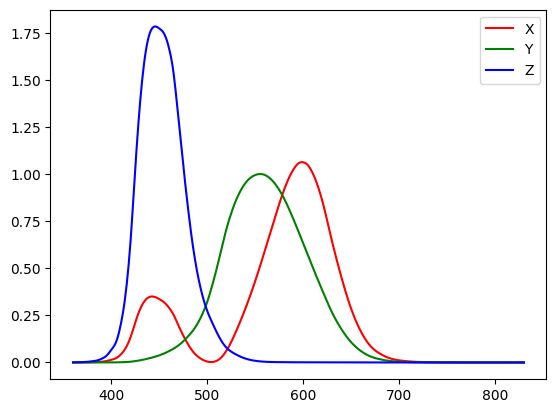

In [10]:
plt.plot(cie.wave_length,cie.x,'r-',label='X')
plt.plot(cie.wave_length,cie.y,'g-',label='Y')
plt.plot(cie.wave_length,cie.z,'b-',label='Z')
plt.legend(loc='upper right')

In [11]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  .. legacy:: class
 |  
 |      For a guide to the intended replacements for `interp1d` see
 |      :ref:`tutorial-interpolate_1Dsection`.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (npoints, ) array_like
 |      A 1-D array of real values.
 |  y : (..., npoints, ...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`. Use the ``axis`` parameter
 |      to select correct axis. Unlike other interpolators, the default
 |      inter

In [12]:
ref_40=pd.read_excel('periodicity_40deg.xlsx', skiprows=2)

In [13]:
ref_40

,Wavelength,ptrn_800nm,ptrn_700nm,ptrn_600nm,ptrn_500nm
0,177.034042,52.876012,253.484363,333.482659,409.458118
1,177.635483,72.227853,243.340757,307.017635,348.903727
2,178.236897,90.618067,233.592082,281.736728,293.898669
3,178.838283,108.046654,224.238336,257.639939,244.442944
4,179.439643,124.513614,215.279519,234.727268,200.536552
...,...,...,...,...,...
1607,1098.293049,62.715985,116.753936,32.497251,67.127021
1608,1098.831547,67.083203,122.050737,30.294343,76.756374
1609,1099.369994,71.623419,127.371256,27.970370,87.304244
1610,1099.908389,76.336633,132.715491,25.525331,98.770631


Now we interpolate experimental data in a selected range of wavelength $\lambda=400nm-700nm$ for the 700nm pattern

# interpolation
now we will interpolate experimental data

In [14]:
f_700=interpolate.interp1d(exp.Wavelength,exp.Ptrn_700nm)

NameError: name 'exp' is not defined

In [ ]:
wvl=np.arange(400,701,1)

In [ ]:
wvl

In [ ]:
y_700=f_700(wvl)
print(y_700)

In [ ]:
plt.plot(wvl,y_700,'g-',label='interpolated')
plt.legend(loc='upper right')

Here is the **experimental** plot shown below

In [ ]:
plt.plot(exp.Wavelength,exp.Ptrn_700nm,'r-',label='experimental')
plt.legend(loc='upper right')
plt.xlim(400,700)

now plot the two functions $R(\lambda)$ as **black** and x of CIE colour matching function as **green** for comparison

In [ ]:
plt.plot(wvl,y_700,'k-',label='exp')
plt.plot(cie.wave_length,cie.x,'g-',label='CIE_x')
plt.legend(loc='upper right')

Now do the same thing for other patterns

In [ ]:
f_600=interpolate.interp1d(exp.Wavelength,exp.Ptrn_600nm)
y_600=f_600(wvl)
f_500=interpolate.interp1d(exp.Wavelength,exp.Ptrn_500nm)
y_500=f_500(wvl)
f_400=interpolate.interp1d(exp.Wavelength,exp.Ptrn_400nm)
y_400=f_400(wvl)
f_300=interpolate.interp1d(exp.Wavelength,exp.Ptrn_300nm)
y_300=f_300(wvl)

Now we do the integration using **trapezoidal rule** to find **X**, **Y**, **Z**

In [ ]:
print(cie.x[40])
print(cie.x[340])

In [ ]:
print(cie.x[40:341])

In [ ]:
x_ch=np.trapz(y_700*cie.x[40:341],wvl)
print(x_ch)

In [ ]:
y_ch=np.trapz(y_700*cie.y[40:341],wvl)
print(y_ch)

In [ ]:
z_ch=np.trapz(y_700*cie.z[40:341],wvl)
print(z_ch)

In [ ]:
x=x_ch/(x_ch+y_ch+z_ch)
y=y_ch/(x_ch+y_ch+z_ch)
print(x,y)

In [ ]:
print(cie.x[40:341])

Now define a function to do all these things for a particular pattern

In [ ]:
def xyval(y):
  xch=np.trapz(y*cie.x[40:341],wvl)
  ych=np.trapz(y*cie.y[40:341],wvl)
  zch=np.trapz(y*cie.z[40:341],wvl)
  x=xch/(xch+ych+zch)
  y=ych/(xch+ych+zch)
  return x,y

In [ ]:
x_700,y_700=xyval(y_700)
print(x_700,y_700)

In [ ]:
x_600,y_600=xyval(y_600)
print(x_600,y_600)

In [ ]:
x_500,y_500=xyval(y_500)
print(x_500,y_500)

In [ ]:
x_400,y_400=xyval(y_400)
print(x_400,y_400)

In [ ]:
x_300,y_300=xyval(y_300)
print(x_300,y_300)

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot([x_700, x_600, x_500, x_400, x_300],[y_700, y_600, y_500, y_400, y_300],'ko--')

In [ ]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(x_700, y_700, 'go--',label='pattern 700nm')
axes.plot(x_600, y_600, 'ro--',label='pattern 600nm')
axes.plot(x_500, y_500, 'bo--',label='pattern 500nm')
axes.plot(x_400, y_400, 'yo--',label='pattern 400nm')
axes.plot(x_300, y_300, 'ko--',label='pattern 300nm')
axes.legend(loc='upper right')

In [ ]:
print(cie.x)

# periodicity variation for particular angle
 Here we will see how periodicity affects the colour for a particular angle of incidence

In [ ]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Now load the **CIE1931 chromaticity colour functions**

In [ ]:
%cd /content/sample_data

In [ ]:
%pwd

In [ ]:
cie=pd.read_excel('CIE_xyz_1931_2deg.xlsx')

In [ ]:
cie

Now we will load the data for the following periodicities
* 800nm
* 700nm
* 600nm
* 500nm
for different angle of incidence $\theta= 40^o, 50^o, 60^o$

In [18]:
ref_40=pd.read_excel('periodicity_40deg.xlsx', skiprows=2)

In [ ]:
ref_40

In [19]:
ref_50=pd.read_excel('periodicity_50deg.xlsx', skiprows=2)

In [ ]:
ref_50

In [20]:
ref_60=pd.read_excel('periodicity_60deg.xlsx', skiprows=2)

In [21]:
ref_60

,Wavelength,ptrn_800nm,ptrn_700nm,ptrn_600nm,ptrn_500nm
0,177.034042,280.646966,282.212680,111.179021,156.72093
1,177.635483,261.130588,260.874909,121.071909,157.11431
2,178.236897,242.409236,240.734687,130.456092,157.46922
3,178.838283,224.482909,221.792014,139.331568,157.78566
4,179.439643,207.351608,204.046890,147.698340,158.06364
...,...,...,...,...,...
1607,1098.293049,99.077252,146.989122,88.767972,37.00717
1608,1098.831547,110.516583,176.855870,90.884729,35.91427
1609,1099.369994,122.822289,209.018338,93.039764,34.78904
1610,1099.908389,135.994372,243.476526,95.233078,33.63148


Here is our function for calculating x, y values

In [15]:
def xyval(y):
  xch=np.trapz(y*cie.x[40:341],wvl)
  ych=np.trapz(y*cie.y[40:341],wvl)
  zch=np.trapz(y*cie.z[40:341],wvl)
  x=xch/(xch+ych+zch)
  y=ych/(xch+ych+zch)
  return x,y

common wavelength for integration

In [16]:
wvl=np.arange(400,701,1)

## For 40 degrees
  now calculate the x,y values for 40 degrees for different periodicity

In [17]:
f40_800=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_800nm)
# obtain y value from interpolated function
y40_800=f40_800(wvl)
# for 700nm periodicity
f40_700=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_700nm)
y40_700=f40_700(wvl)
# for 600nm periodicity
f40_600=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_600nm)
y40_600=f40_600(wvl)
# for 500nm periodicity
f40_500=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_500nm)
y40_500=f40_500(wvl)

x, y values for

**800nm**

In [22]:
xch40_800,ych40_800=xyval(y40_800)
print(xch40_800,ych40_800)

0.605654123512 0.292307008391


**700nm**

In [23]:
xch40_700,ych40_700=xyval(y40_700)
print(xch40_700,ych40_700)

0.523938491323 0.446455063464


**600nm**

In [24]:
xch40_600,ych40_600=xyval(y40_600)
print(xch40_600,ych40_600)

0.0988722735965 0.462121301106


**500nm**

In [25]:
xch40_500,ych40_500=xyval(y40_500)
print(xch40_500,ych40_500)

0.239657854941 0.141534004232


## plot for 40 deg
now plot these values in **chromaticity diagram**

In [26]:
x40=[xch40_800,xch40_700,xch40_600,xch40_500]
y40=[ych40_800,ych40_700,ych40_600,ych40_500]
print('x values=',x40)
print('y values=',y40)

x values= [0.60565412351157533, 0.52393849132332004, 0.098872273596496182, 0.23965785494131217]
y values= [0.2923070083914322, 0.44645506346376945, 0.46212130110564553, 0.14153400423177026]


/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


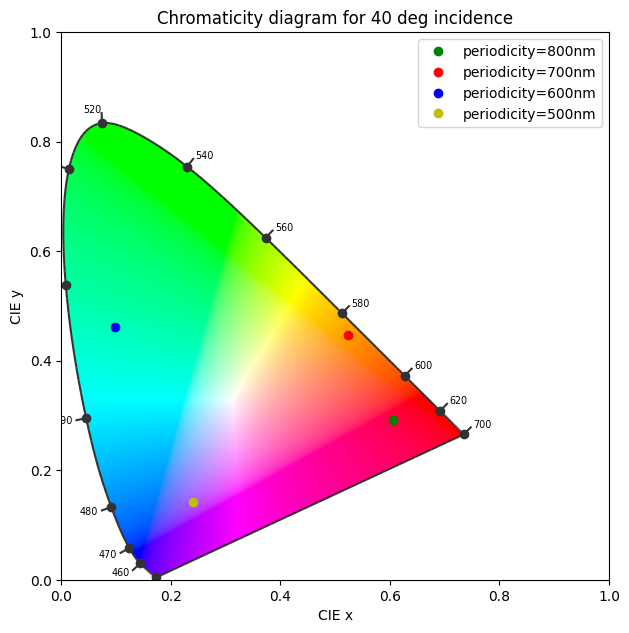

In [27]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch40_800,ych40_800, 'go', label='periodicity=800nm')
axes.plot(xch40_700, ych40_700, 'ro', label='periodicity=700nm')
axes.plot(xch40_600, ych40_600, 'bo', label='periodicity=600nm')
axes.plot(xch40_500, ych40_500, 'yo', label='periodicity=500nm')
plt.title('Chromaticity diagram for 40 deg incidence')
plt.legend(loc='upper right')

## For 50 deg
  repeat the same thing for 50 deg

In [28]:
f50_800=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_800nm)
# obtain y value from interpolated function
y50_800=f50_800(wvl)
# for 700nm periodicity
f50_700=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_700nm)
y50_700=f50_700(wvl)
# for 600nm periodicity
f50_600=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_600nm)
y50_600=f50_600(wvl)
# for 500nm periodicity
f50_500=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_500nm)
y50_500=f50_500(wvl)

x, y values for

**800nm**

In [29]:
xch50_800,ych50_800=xyval(y50_800)
print(xch50_800,ych50_800)

0.593268636375 0.373365723632


**700nm**

In [30]:
xch50_700,ych50_700=xyval(y50_700)
print(xch50_700,ych50_700)

0.199967228154 0.624508758169


**600nm**

In [31]:
xch50_600,ych50_600=xyval(y50_600)
print(xch50_600,ych50_600)

0.15754353318 0.214460768301


**500nm**

In [32]:
xch50_500,ych50_500=xyval(y40_500)
print(xch50_500,ych50_500)

0.239657854941 0.141534004232


## plot for 50 deg
now plot these values in **chromaticity diagram**

In [33]:
x50=[xch50_800,xch40_700,xch40_600,xch40_500]
y40=[ych40_800,ych40_700,ych40_600,ych40_500]
print('x values=',x40)
print('y values=',y40)

x values= [0.60565412351157533, 0.52393849132332004, 0.098872273596496182, 0.23965785494131217]
y values= [0.2923070083914322, 0.44645506346376945, 0.46212130110564553, 0.14153400423177026]


/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


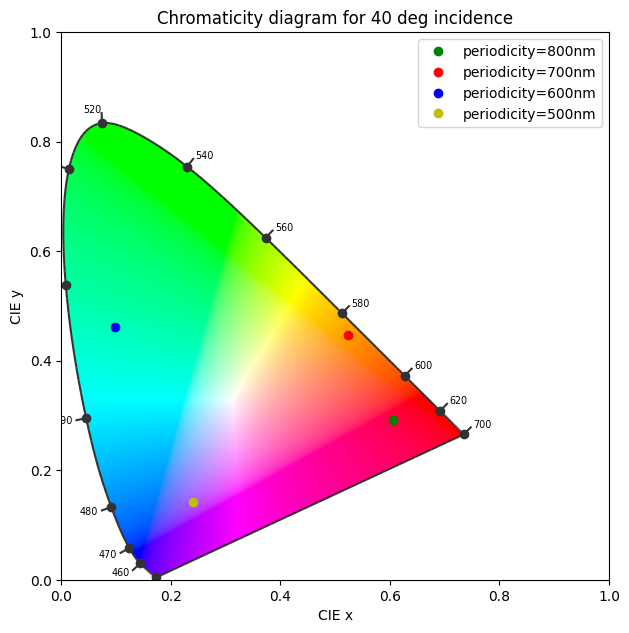

In [34]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch40_800,ych40_800, 'go', label='periodicity=800nm')
axes.plot(xch40_700, ych40_700, 'ro', label='periodicity=700nm')
axes.plot(xch40_600, ych40_600, 'bo', label='periodicity=600nm')
axes.plot(xch40_500, ych40_500, 'yo', label='periodicity=500nm')
plt.title('Chromaticity diagram for 40 deg incidence')
plt.legend(loc='upper right')

## For 60 deg
Interpolate for different patterns

In [35]:
f60_800=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_800nm)
# obtain y value from interpolated function
y60_800=f60_800(wvl)
# for 700nm periodicity
f60_700=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_700nm)
y60_700=f60_700(wvl)
# for 600nm periodicity
f60_600=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_600nm)
y60_600=f60_600(wvl)
# for 500nm periodicity
f60_500=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_500nm)
y60_500=f60_500(wvl)

Now calculate the **x,y** values for the patterns

In [36]:
xch60_800,ych60_800=xyval(y60_800)
print('xch60_800,ych60_800=',xch60_800,ych60_800)
#for 700nm pattern
xch60_700,ych60_700=xyval(y60_700)
print('xch60_700,ych60_700=',xch60_700,ych60_700)
# for 600nm pattern
xch60_600,ych60_600=xyval(y60_600)
print('xch60_600,ych60_600=',xch60_600,ych60_600)
#for 500nm pattern
xch60_500,ych60_500=xyval(y60_500)
print('xch60_500,ych60_500=',xch60_500,ych60_500)


xch60_800,ych60_800= 0.351074823223 0.32801317945
xch60_700,ych60_700= 0.610255231918 0.356354626128
xch60_600,ych60_600= 0.217471511306 0.707190356492
xch60_500,ych60_500= 0.277287646373 0.279994026862


## plot for 60 deg
now plot the points

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


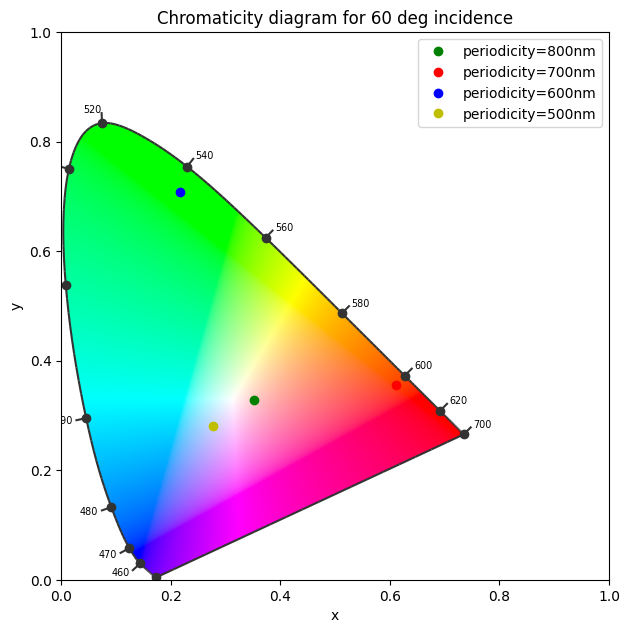

In [38]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch60_800,ych60_800, 'go', label='periodicity=800nm')
axes.plot(xch60_700, ych60_700, 'ro', label='periodicity=700nm')
axes.plot(xch60_600, ych60_600, 'bo', label='periodicity=600nm')
axes.plot(xch60_500, ych60_500, 'yo', label='periodicity=500nm')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Chromaticity diagram for 60 deg incidence')
plt.legend(loc='upper right')